In [ ]:
import torch
import matplotlib.pyplot as plt
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ProgressBar, ModelCheckpoint
from models.train_wrapper import AutoEncoder
from processor.processor import DataModule

### Data Load

In [2]:
data_module = DataModule()
train_loader = data_module.train_dataloader()

In [3]:
# X, y = next(iter(train_loader))
# X.shape, y.shape, len(data_module.dataset)

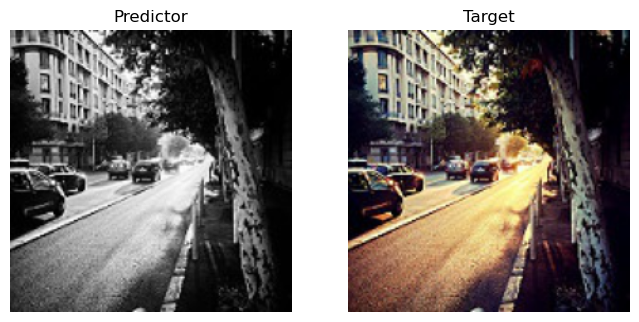

In [4]:
data_module.plot_sample(12)

### Training

In [5]:
model = AutoEncoder()

num_epochs = 20
# checkpoint_callback = ModelCheckpoint(monitor='val_loss')
trainer = Trainer(max_epochs=num_epochs, fast_dev_run=False, num_sanity_val_steps=0) # , callbacks=[checkpoint_callback])
trainer.fit(model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3050 Ti Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type    | Params
--------------------------------------
0 | model     | UNet    | 1.9 M 
1 | criterion | MSELoss | 0     
--------------------------------------
1.9 M     Trainable params
0         Non-trainable params
1.9 M     Total params
7.763     Total estimated model params size (MB)
2023-12-15 11:57:07.246198: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly di

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


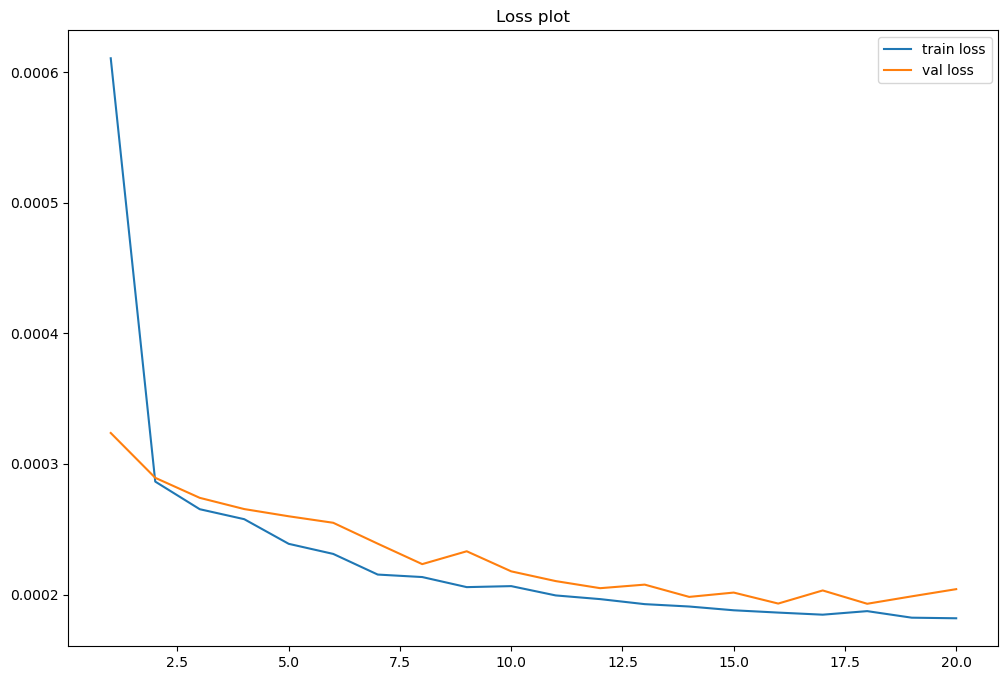

In [6]:
model.plot_loss()

In [11]:
trainer.test(model)

You are using a CUDA device ('NVIDIA GeForce RTX 3050 Ti Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss          0.006190240848809481
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.006190240848809481}]

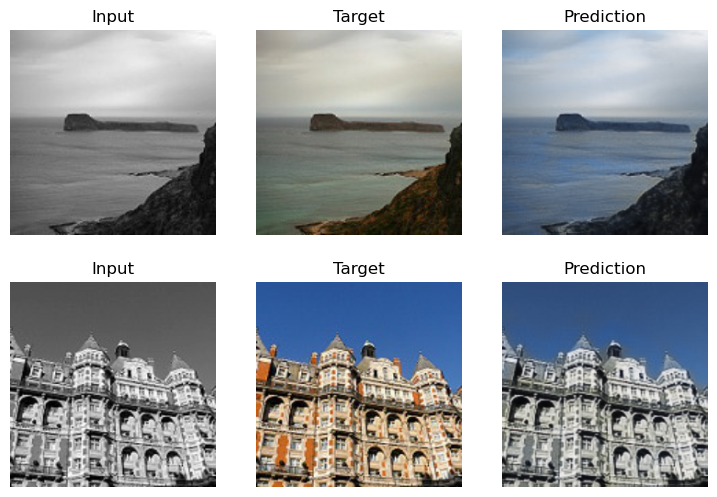

batch loss: 0.007145838811993599


In [13]:
model.visualize_predict(num_samples=2)

In [9]:
model.save_model('test.pt')